In [1]:
import pandas as pd




In [2]:
df=pd.read_csv('Database\Weights.csv')

In [3]:
df

,Unnamed: 0,event,timestamp,weight,duration,station
0,0,2,1655519507,0.845,64,4
1,1,3,1655519747,0.900,10,4
2,2,4,1655519892,0.915,12,4
3,3,5,1655519943,0.835,14,4
4,4,6,1655520282,0.920,8,4
...,...,...,...,...,...,...
10548,10548,7,1655294953,0.895,186,20
10549,10549,8,1655305279,0.910,44,20
10550,10550,9,1655321275,0.865,10,20
10551,10551,10,1655321342,1.055,1497,20


In [4]:
df['Time']=pd.to_datetime(df['timestamp'],unit="s")

In [5]:
df.sort_values(by='Time')

,Unnamed: 0,event,timestamp,weight,duration,station,Time
4291,4291,2,1651655658,1.010,4,4,2022-05-04 09:14:18
4292,4292,3,1651655779,1.030,10,4,2022-05-04 09:16:19
4293,4293,4,1651655940,1.010,4,4,2022-05-04 09:19:00
4294,4294,5,1651656462,1.020,4,4,2022-05-04 09:27:42
4295,4295,6,1651656529,1.015,2,4,2022-05-04 09:28:49
...,...,...,...,...,...,...,...
3947,3947,2,1659067389,0.810,38,4,2022-07-29 04:03:09
3948,3948,3,1659078734,0.930,18,4,2022-07-29 07:12:14
5942,5942,2,1659266586,0.910,54,4,2022-07-31 11:23:06
5943,5943,3,1659266864,0.905,18,4,2022-07-31 11:27:44


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


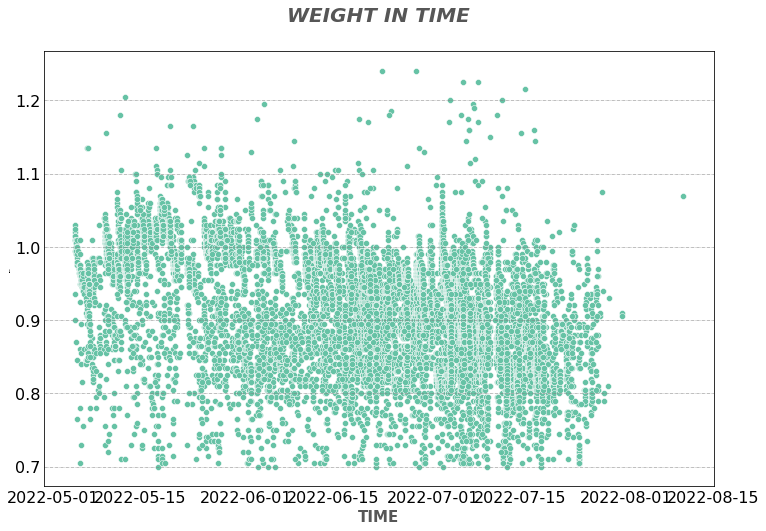

In [7]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data = df, x = "Time", y = "weight",color='#66c2a5')
ax.set_xlabel('TIME',weight='bold',size=15,color='#565656')
ax.set_ylabel('WEIGHT',weight='bold',size=0)
ax.set_title('WEIGHT IN TIME',fontsize=20, weight='bold',style='italic',loc='center',pad=30,color='#565656')
ax.tick_params(labelsize=16,length=0)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')



In [8]:
df[df["Time"].dt.dayofyear==124]['weight'].mean()

0.9830263157894734

In [9]:
df['dayofyear']=df["Time"].dt.dayofyear

In [10]:
df

,Unnamed: 0,event,timestamp,weight,duration,station,Time,dayofyear
0,0,2,1655519507,0.845,64,4,2022-06-18 02:31:47,169
1,1,3,1655519747,0.900,10,4,2022-06-18 02:35:47,169
2,2,4,1655519892,0.915,12,4,2022-06-18 02:38:12,169
3,3,5,1655519943,0.835,14,4,2022-06-18 02:39:03,169
4,4,6,1655520282,0.920,8,4,2022-06-18 02:44:42,169
...,...,...,...,...,...,...,...,...
10548,10548,7,1655294953,0.895,186,20,2022-06-15 12:09:13,166
10549,10549,8,1655305279,0.910,44,20,2022-06-15 15:01:19,166
10550,10550,9,1655321275,0.865,10,20,2022-06-15 19:27:55,166
10551,10551,10,1655321342,1.055,1497,20,2022-06-15 19:29:02,166


In [11]:
df_group_day=df.groupby('dayofyear')[['weight']].mean()

In [12]:
df_group_day

,weight
dayofyear,
124,0.983026
125,0.934286
126,0.917929
127,0.918448
128,0.902917
...,...
208,0.897581
209,0.901250
210,0.870000


In [13]:
df_group_day.drop(labels = [222],axis = 0,inplace=True)
df_group_day.drop(labels = [205],axis = 0,inplace=True)

In [14]:
df_group_day[df_group_day['weight']<0.8]

,weight
dayofyear,


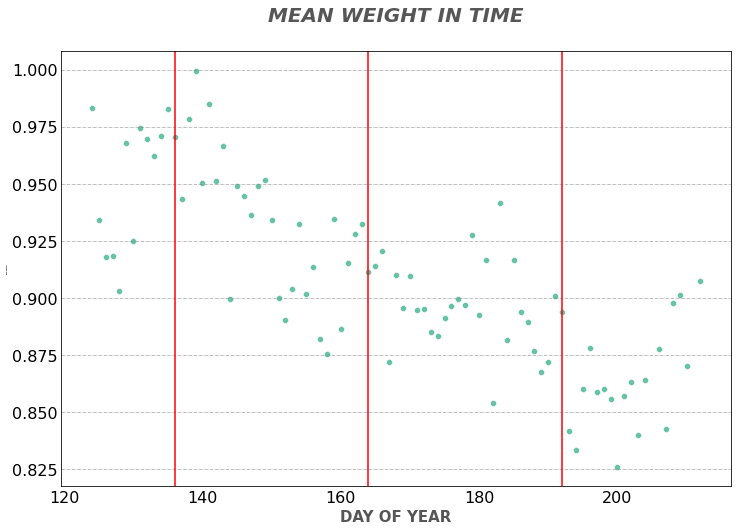

In [15]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data = df_group_day, x = "dayofyear", y = "weight",color='#66c2a5')
ax.set_xlabel('DAY OF YEAR',weight='bold',size=15,color='#565656')
ax.set_ylabel('MEAN OFWEIGHT',weight='bold',size=0)
ax.set_title('MEAN WEIGHT IN TIME',fontsize=20, weight='bold',style='italic',loc='center',pad=30,color='#565656')
ax.tick_params(labelsize=16,length=0)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.axvline(136, color='r')
plt.axvline(164, color='r')
plt.axvline(192, color='r')


In [16]:
df_group_day['dayofyear']=df_group_day.index

In [17]:
len(df_group_day['dayofyear'])

87

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
x = np.array(df_group_day['dayofyear']).reshape((-1, 1))
y = np.array(df_group_day['weight'])

In [21]:
model.fit(x, y)

LinearRegression()

In [22]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.605844715739158


In [23]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)


intercept: 1.1115192187823864
slope: [-0.00121453]


In [24]:
x_new=np.array([[124],[200],[300]])
y_pred = model.predict(x_new.reshape((-1, 1)))
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.96091783 0.86861376 0.74716103]


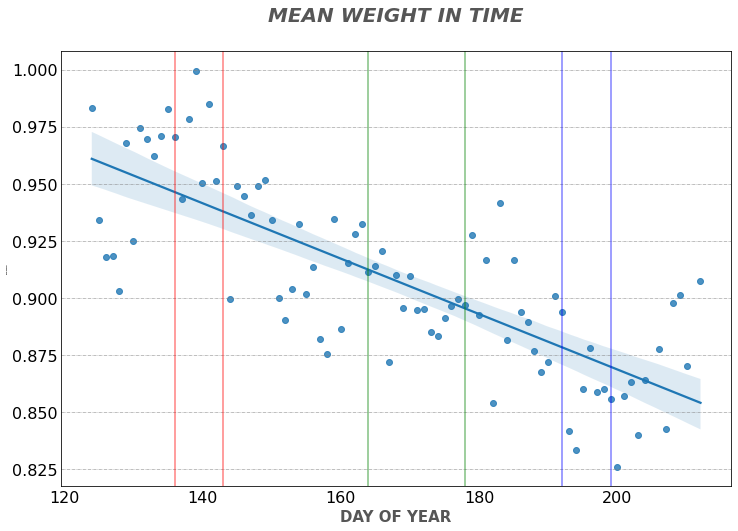

In [25]:
fig,ax = plt.subplots(figsize=(12,8))
sns.regplot(data = df_group_day, x = "dayofyear", y = "weight")
ax.set_xlabel('DAY OF YEAR',weight='bold',size=15,color='#565656')
ax.set_ylabel('MEAN OFWEIGHT',weight='bold',size=0)
ax.set_title('MEAN WEIGHT IN TIME',fontsize=20, weight='bold',style='italic',loc='center',pad=30,color='#565656')
ax.tick_params(labelsize=16,length=0)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.axvline(136, color='r', alpha=0.5)
plt.axvline(143, color='r', alpha=0.5)
plt.axvline(164, color='g',alpha=0.5)
plt.axvline(178, color='g',alpha=0.5)
plt.axvline(192, color='b',alpha=0.5)
plt.axvline(199, color='b',alpha=0.5)
plt.show()

In [26]:
x_new=np.array([[124],[125],[126],[127],[128],[129]])
y_pred = model.predict(x_new)
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.96091783 0.95970331 0.95848878 0.95727425 0.95605972 0.9548452 ]


In [27]:
0.95970331-0.96091783

-0.0012145199999999967

In [28]:
0.96420457-0.96560149

-0.0013969199999999127

In [29]:
x_new=np.array([[124],[212]])
y_pred = model.predict(x_new)
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.96091783 0.85403943]


In [30]:
0.96699841-0.84406933

0.12292908000000002

<AxesSubplot:xlabel='Time', ylabel='weight'>

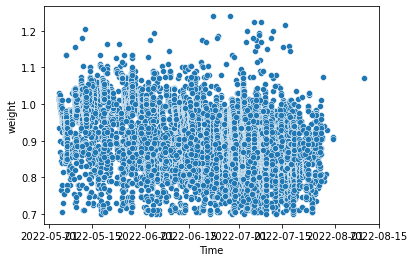

In [31]:
sns.scatterplot(data = df, x = "Time", y = "weight")

In [32]:
model2 = LinearRegression()

In [33]:
x = np.array(df['dayofyear']).reshape((-1, 1))
y = np.array(df['weight'])

In [34]:
model.fit(x, y)

LinearRegression()

In [35]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.1328769106213834


In [36]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.1447358320297651
slope: [-0.00141084]


In [37]:
df=df.sort_values(by='dayofyear')

In [38]:
df

,Unnamed: 0,event,timestamp,weight,duration,station,Time,dayofyear
4326,4326,37,1651696066,0.980,78,4,2022-05-04 20:27:46,124
4311,4311,22,1651674330,1.000,52,4,2022-05-04 14:25:30,124
4309,4309,20,1651674128,0.995,22,4,2022-05-04 14:22:08,124
4308,4308,19,1651673901,1.005,40,4,2022-05-04 14:18:21,124
4307,4307,18,1651673662,1.010,118,4,2022-05-04 14:14:22,124
...,...,...,...,...,...,...,...,...
3947,3947,2,1659067389,0.810,38,4,2022-07-29 04:03:09,210
3948,3948,3,1659078734,0.930,18,4,2022-07-29 07:12:14,210
5943,5943,3,1659266864,0.905,18,4,2022-07-31 11:27:44,212
5942,5942,2,1659266586,0.910,54,4,2022-07-31 11:23:06,212


In [39]:
df_first_week=df[df['dayofyear']<131]
df_2_last_week=df[df['dayofyear']>199]

In [40]:
df_first_week

,Unnamed: 0,event,timestamp,weight,duration,station,Time,dayofyear
4326,4326,37,1651696066,0.980,78,4,2022-05-04 20:27:46,124
4311,4311,22,1651674330,1.000,52,4,2022-05-04 14:25:30,124
4309,4309,20,1651674128,0.995,22,4,2022-05-04 14:22:08,124
4308,4308,19,1651673901,1.005,40,4,2022-05-04 14:18:21,124
4307,4307,18,1651673662,1.010,118,4,2022-05-04 14:14:22,124
...,...,...,...,...,...,...,...,...
4234,4234,9,1652158536,0.995,42,4,2022-05-10 04:55:36,130
4235,4235,10,1652160633,1.000,76,4,2022-05-10 05:30:33,130
4237,4237,12,1652167825,0.985,76,4,2022-05-10 07:30:25,130
4229,4229,4,1652155063,0.985,14,4,2022-05-10 03:57:43,130


In [41]:
df_2_last_week

,Unnamed: 0,event,timestamp,weight,duration,station,Time,dayofyear
6030,6030,57,1658226645,0.800,20,4,2022-07-19 10:30:45,200
6025,6025,52,1658220396,0.785,78,4,2022-07-19 08:46:36,200
6026,6026,53,1658221989,1.035,178,4,2022-07-19 09:13:09,200
6027,6027,54,1658222413,0.790,244,4,2022-07-19 09:20:13,200
6028,6028,55,1658223423,0.805,370,4,2022-07-19 09:37:03,200
...,...,...,...,...,...,...,...,...
3947,3947,2,1659067389,0.810,38,4,2022-07-29 04:03:09,210
3948,3948,3,1659078734,0.930,18,4,2022-07-29 07:12:14,210
5943,5943,3,1659266864,0.905,18,4,2022-07-31 11:27:44,212
5942,5942,2,1659266586,0.910,54,4,2022-07-31 11:23:06,212


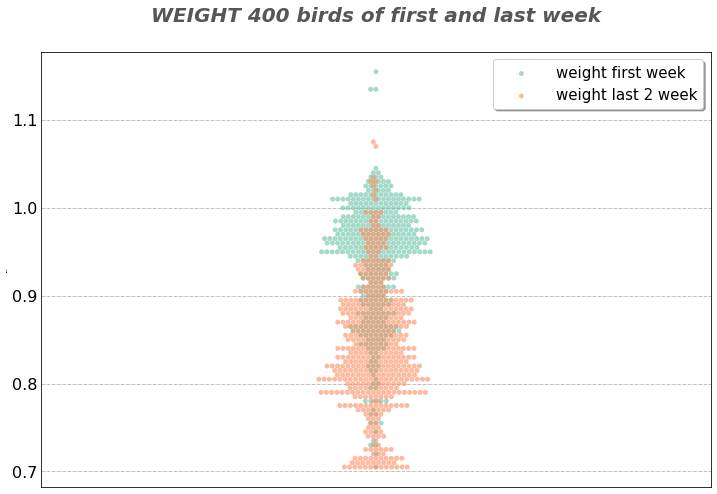

In [42]:

fig,ax = plt.subplots(figsize=(12,8))
sns.swarmplot(y = "weight", data = df_first_week, color='#66c2a5',alpha=0.6)
sns.swarmplot(y = "weight", data = df_2_last_week,color='#fc8d62', alpha=0.6)
ax.set_ylabel('WEIGHT',weight='bold',size=0)
ax.tick_params(labelsize=16,length=0)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.legend( ['weight first week', 'weight last 2 week'], shadow=True, handlelength=3.0,fontsize=15)
ax.set_title('WEIGHT 400 birds of first and last week',fontsize=20, weight='bold',style='italic',loc='center',pad=30,color='#565656')
plt.show()

In [43]:
print(sns.color_palette("Set2").as_hex())

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


In [44]:
Mean_weight__1_week=df_first_week['weight']

In [45]:
Mean_weight__last_week=df_2_last_week['weight']

In [46]:
import scipy.stats as stats

Null hypothesis (H0): ud = 0, which translates to the mean difference between mean weights first week and mean weights last week is equal to 0.
Alternative hypothesis (HA): ud ≠ 0, which translates to the mean difference between mean weights first week and mean weights last week is not equal to 0.
If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.

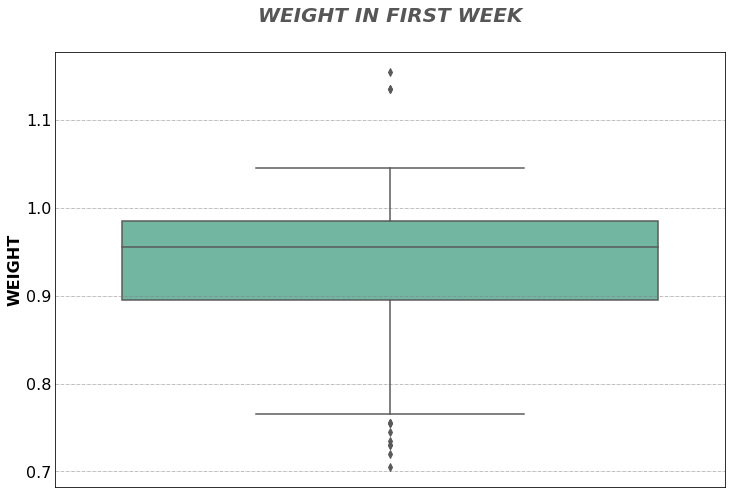

In [47]:

fig,ax = plt.subplots(figsize=(12,8))
sns.boxplot(y = "weight", data = df_first_week, color='#66c2a5')
ax.set_ylabel('WEIGHT',weight='bold',size=16)
ax.tick_params(labelsize=16,length=0)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.set_title('WEIGHT IN FIRST WEEK',fontsize=20, weight='bold',style='italic',loc='center',pad=30,color='#565656')
plt.show()

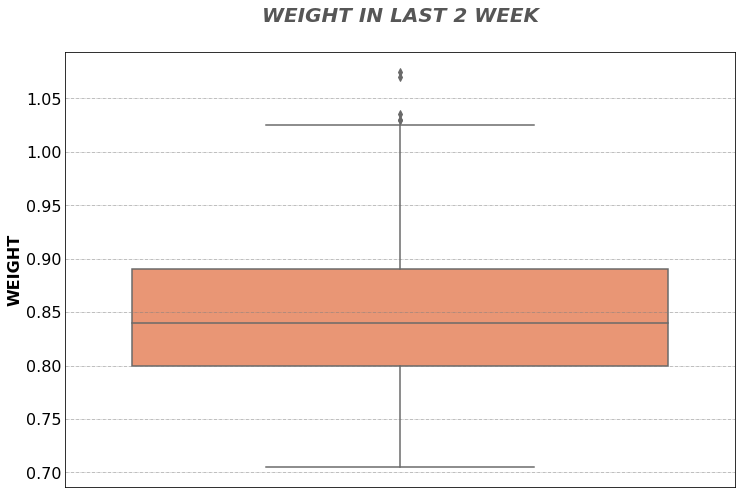

In [48]:

fig,ax = plt.subplots(figsize=(12,8))
sns.boxplot(y = "weight", data = df_2_last_week, color='#fc8d62')
ax.set_ylabel('WEIGHT',weight='bold',size=16)
ax.tick_params(labelsize=16,length=0)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.set_title('WEIGHT IN LAST 2 WEEK',fontsize=20, weight='bold',style='italic',loc='center',pad=30,color='#565656')
plt.show()

In [49]:
df_first_week

,Unnamed: 0,event,timestamp,weight,duration,station,Time,dayofyear
4326,4326,37,1651696066,0.980,78,4,2022-05-04 20:27:46,124
4311,4311,22,1651674330,1.000,52,4,2022-05-04 14:25:30,124
4309,4309,20,1651674128,0.995,22,4,2022-05-04 14:22:08,124
4308,4308,19,1651673901,1.005,40,4,2022-05-04 14:18:21,124
4307,4307,18,1651673662,1.010,118,4,2022-05-04 14:14:22,124
...,...,...,...,...,...,...,...,...
4234,4234,9,1652158536,0.995,42,4,2022-05-10 04:55:36,130
4235,4235,10,1652160633,1.000,76,4,2022-05-10 05:30:33,130
4237,4237,12,1652167825,0.985,76,4,2022-05-10 07:30:25,130
4229,4229,4,1652155063,0.985,14,4,2022-05-10 03:57:43,130


In [50]:
WFW=df_first_week['weight']
WLW=df_2_last_week['weight']

In [51]:
Q1_first=WFW.quantile(0.25)
Q3_first=WFW.quantile(0.75)
Q1_last=WLW.quantile(0.25)
Q3_last=WLW.quantile(0.75)

In [52]:
n_WFW=WFW[(WFW>Q1_first)&(WFW<Q3_first)]

In [53]:
n_WLW=WLW[(WLW>Q1_first)&(WLW<Q3_first)]

<AxesSubplot:ylabel='weight'>

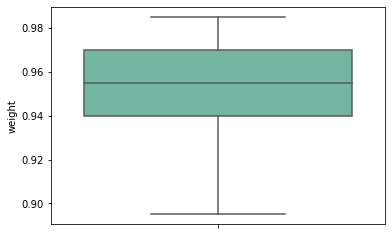

In [54]:
sns.boxplot(y = n_WFW, color='#66c2a5')

<AxesSubplot:ylabel='weight'>

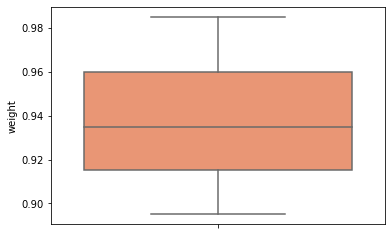

In [55]:
sns.boxplot(y = n_WLW, color='#fc8d62')

In [56]:
t_value,p_value=stats.ttest_ind(n_WFW,n_WLW)
t_value,p_value

(5.218598043553114, 3.3709448690901424e-07)

In [57]:
n_WLW.mean()

0.937119565217391

In [58]:
n_WFW.mean()

0.9527857142857147

In [59]:
n_WLW.mean()-n_WFW.mean()

-0.015666149068323643

In [60]:
print(f"p = {3.3709448690901424e-07:.10f}")

p = 0.0000003371


In [75]:
import statsmodels.api as sm

 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     18.25
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.95e-05
Time:                        22:09:53   Log-Likelihood:                 11450.
No. Observations:               10553   AIC:                        -2.290e+04
Df Residuals:                   10551   BIC:                        -2.288e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8762      0.006    135.197      0.0

R-squared : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained

Adj. R-squared : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.

F-statistic : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.

coef : the coefficients of the independent variables and the constant term in the equation.

t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error

R-squared - statistical measure of how well the regression line approximates the real data points.

Adj. R-squared - actually adjusts the statistics based on the number of independent variables present.

F-statistic - the ratio of mean squared error of the model to the mean squared error of residuals.

AIC - estimates the relative quality of statistical models for a given dataset.

BIC - used as a criterion for model selection among a finite set of models.

coef - the coefficients of the independent variables and the constant term in the equation.

std err - the basic standard error of the estimate of the coefficient.

t - a measure of how statistically significant the coefficient is.

P > |t| - the null-hypothesis that the coefficient = 0 is true.

In [76]:
df_group_day.to_csv('Database\LR.csv')